In [57]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")

  Activating project at `~/DrugResponseModel.jl`


In [58]:
using DelimitedFiles
using Plots
using Measures
using LinearAlgebra
using Statistics
using DSP: conv
using BlackBoxOptim
using JLD
using Distributions
using DataFrames
using XLSX
using StatsPlots
using NumericalIntegration
using CSV
using MultivariateStats
using Impute

In [59]:
using DrugResponseModel

In [60]:
using Plots.PlotMeasures 
gr()

Plots.GRBackend()

In [61]:
concs, popul1, g1s1, g2s1 = DrugResponseModel.load(189, 1)
_, popul2, g1s2, g2s2 = DrugResponseModel.load(189, 2)
_, popul3, g1s3, g2s3 = DrugResponseModel.load(189, 3)

_

LoadError: all-underscore identifier used as rvalue

In [62]:
# find the average of the three replicates
g1S = cat(g1s1, g1s2, g1s3, dims = 4)
g2S = cat(g2s1, g2s2, g2s3, dims = 4)
g1m = mean(g1S, dims = 4) # mean G1
g2m = mean(g2S, dims = 4) # mean G2

time = LinRange(0.0, 95.0, 189)

189-element LinRange{Float64, Int64}:
 0.0,0.505319,1.01064,1.51596,2.02128,…,92.9787,93.484,93.9894,94.4947,95.0

In [63]:
l_cost_820, l_hill_820 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 8, nG2 = 20, maxstep = 100000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_820 = getODEparams(l_hill_820, concs[:, 1])

l_G1_820 = zeros(189, 8) # model prediction of cell numbers for all 8 concentrations of lapatinib
l_G2_820 = zeros(189, 8)

#default: nG1 = 8, nG2 = 20  
for i = 1:8
    l_G1_820[:, i], l_G2_820[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_820[:, i, 1], l_hill_ODE_820[:, 1, 1], time)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 30129 evals, 30013 steps, improv/step: 0.223 (last = 0.2233), fitness=496.669931045
DE modify state:
200.00 secs, 59815 evals, 59701 steps, improv/step: 0.199 (last = 0.1741), fitness=335.078477568
DE modify state:
300.00 secs, 90125 evals, 90013 steps, improv/step: 0.179 (last = 0.1405), fitness=334.772618627
DE modify state:

Optimization stopped after 100001 steps and 333.30 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 300.03
Function evals per second = 300.37
Improvements/step = 0.17870
Total function evaluations = 100113


Best candidate found: [28.4933, 2.34535, 1.34813e-9, 3.9997, 3.99972, 3.9999, 3.99998, 0.571945, 3.99998, 3.99999, 0.0011243, 1.4163e-7, 3.3137e-7, 4.90873e-7, 1.38201e-7, 3.7996e-9, 5.07392e-8

In [64]:
l_cost_816, l_hill_816 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 8, nG2 = 16, maxstep = 100000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_816 = getODEparams(l_hill_816, concs[:, 1])

l_G1_816 = zeros(189, 8) 
l_G2_816 = zeros(189, 8)

#nG2 reduced: nG1 = 8, nG2 = 16 
for i = 1:8
    l_G1_816[:, i], l_G2_816[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_816[:, i, 1], l_hill_ODE_816[:, 1, 1], time, 8, 16)
end



Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 28303 evals, 28179 steps, improv/step: 0.199 (last = 0.1993), fitness=589.168312937
DE modify state:
200.00 secs, 56659 evals, 56536 steps, improv/step: 0.221 (last = 0.2434), fitness=357.465890864
DE modify state:
300.01 secs, 85430 evals, 85309 steps, improv/step: 0.203 (last = 0.1661), fitness=329.458103122
DE modify state:

Optimization stopped after 100001 steps and 350.49 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 285.32
Function evals per second = 285.66
Improvements/step = 0.19902
Total function evaluations = 100121


Best candidate found: [23.8098, 2.00724, 2.1609e-8, 0.449884, 0.328318, 3.99822, 3.99938, 3.99944, 3.99824, 3.99997, 0.00150454, 2.60891e-7, 1.53344e-6, 6.43265e-7, 2.3004e-6, 4.06444e-7, 9.928

In [65]:
l_cost_1232, l_hill_1232 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 12, nG2 = 32, maxstep = 100000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_1232 = getODEparams(l_hill_1232, concs[:, 1])

l_G1_1232 = zeros(189, 8) 
l_G2_1232 = zeros(189, 8)


#both nG1 and nG2 increased: nG1 = 12, nG2 = 32 
for i = 1:8
    l_G1_1232[:, i], l_G2_1232[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_1232[:, i, 1], l_hill_ODE_1232[:, 1, 1], time, 12, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 30012 evals, 29841 steps, improv/step: 0.227 (last = 0.2272), fitness=501.692799523
DE modify state:
200.00 secs, 60070 evals, 59900 steps, improv/step: 0.205 (last = 0.1827), fitness=332.060081979
DE modify state:
300.01 secs, 89841 evals, 89673 steps, improv/step: 0.189 (last = 0.1560), fitness=329.838343275
DE modify state:

Optimization stopped after 100001 steps and 333.96 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 299.44
Function evals per second = 299.94
Improvements/step = 0.18744
Total function evaluations = 100168


Best candidate found: [23.881, 2.01051, 7.08275e-9, 0.44865, 3.99997, 0.341094, 3.99993, 3.99979, 3.99998, 3.99997, 0.00148669, 2.98243e-8, 5.73144e-7, 3.33815e-8, 1.57084e-7, 2.91942e-8, 3.056

In [66]:
l_cost_832, l_hill_832 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 8, nG2 = 32, maxstep = 100000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_832 = getODEparams(l_hill_832, concs[:, 1])

l_G1_832 = zeros(189, 8) 
l_G2_832 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 32  
for i = 1:8
    l_G1_832[:, i], l_G2_832[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_832[:, i, 1], l_hill_ODE_832[:, 1, 1], time, 8, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 30159 evals, 30066 steps, improv/step: 0.203 (last = 0.2035), fitness=589.150899244
DE modify state:
200.00 secs, 59979 evals, 59889 steps, improv/step: 0.209 (last = 0.2155), fitness=330.425869455
DE modify state:
300.01 secs, 89144 evals, 89056 steps, improv/step: 0.199 (last = 0.1761), fitness=329.766070054
DE modify state:

Optimization stopped after 100001 steps and 338.04 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 295.83
Function evals per second = 296.09
Improvements/step = 0.19469
Total function evaluations = 100088


Best candidate found: [23.7849, 2.00239, 1.31404e-9, 4.0, 0.449453, 0.323171, 3.99999, 3.99999, 3.99999, 4.0, 0.00150502, 3.23641e-7, 4.75362e-9, 4.05423e-9, 6.44306e-9, 7.28281e-9, 7.14735e-9,

In [67]:
l_cost_1220, l_hill_1220 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 12, nG2 = 20, maxstep = 100000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_1220 = getODEparams(l_hill_1220, concs[:, 1])

l_G1_1220 = zeros(189, 8) 
l_G2_1220 = zeros(189, 8)


#nG1 increased: nG1 = 12, nG2 = 20 
for i = 1:8
    l_G1_1220[:, i], l_G2_1220[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_1220[:, i, 1], l_hill_ODE_1220[:, 1, 1], time, 12, 20)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 30049 evals, 29941 steps, improv/step: 0.197 (last = 0.1973), fitness=341.999424611
DE modify state:
200.00 secs, 59263 evals, 59157 steps, improv/step: 0.176 (last = 0.1533), fitness=329.431557132
DE modify state:
300.00 secs, 88033 evals, 87927 steps, improv/step: 0.174 (last = 0.1696), fitness=329.383899864
DE modify state:

Optimization stopped after 100001 steps and 342.26 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 292.18
Function evals per second = 292.49
Improvements/step = 0.16901
Total function evaluations = 100107


Best candidate found: [23.7448, 1.99972, 1.06719e-9, 0.451051, 0.323827, 4.0, 4.0, 4.0, 4.0, 4.0, 0.00152885, 4.72011e-9, 1.3586e-9, 1.70382e-8, 5.87041e-9, 2.37034e-9, 4.63736e-9, 2.0139e-9, 0

In [91]:
l_cost_824, l_hill_824 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 8, nG2 = 24, maxstep = 100000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_824 = getODEparams(l_hill_824, concs[:, 1])

l_G1_824 = zeros(189, 8) 
l_G2_824 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 24  
for i = 1:8
    l_G1_824[:, i], l_G2_824[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_824[:, i, 1], l_hill_ODE_824[:, 1, 1], time, 8, 24)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 26640 evals, 26538 steps, improv/step: 0.212 (last = 0.2124), fitness=407.855449050
DE modify state:
200.00 secs, 52692 evals, 52593 steps, improv/step: 0.201 (last = 0.1888), fitness=329.854009164
DE modify state:
300.00 secs, 79876 evals, 79778 steps, improv/step: 0.194 (last = 0.1822), fitness=329.765643968
DE modify state:

Optimization stopped after 100001 steps and 372.87 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 268.19
Function evals per second = 268.46
Improvements/step = 0.18869
Total function evaluations = 100099


Best candidate found: [23.7858, 2.0025, 1.05925e-9, 4.0, 0.449443, 0.323211, 4.0, 4.0, 4.0, 4.0, 0.00150447, 2.7187e-8, 4.66873e-9, 6.4615e-9, 9.27697e-9, 1.57411e-9, 2.03865e-9, 4.28915e-9, 0.

In [68]:
d_cost_820, d_hill_820 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 8, nG2 = 20, maxstep = 100000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_820 = getODEparams(d_hill_820, concs[:, 2])

d_G1_820 = zeros(189, 8) # model prediction of cell numbers for all 8 concentrations of lapatinib
d_G2_820 = zeros(189, 8)

#default: nG1 = 8, nG2 = 20  
for i = 1:8
    d_G1_820[:, i], d_G2_820[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_820[:, i, 1], d_hill_ODE_820[:, 1, 1], time)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 28939 evals, 28804 steps, improv/step: 0.165 (last = 0.1646), fitness=375.824674128
DE modify state:
200.02 secs, 57020 evals, 56885 steps, improv/step: 0.153 (last = 0.1407), fitness=363.614495064
DE modify state:
300.02 secs, 84240 evals, 84109 steps, improv/step: 0.142 (last = 0.1200), fitness=363.589273950
DE modify state:

Optimization stopped after 100001 steps and 359.26 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 278.36
Function evals per second = 278.72
Improvements/step = 0.13772
Total function evaluations = 100131


Best candidate found: [35.4002, 2.09589, 1.63283e-9, 1.38999, 1.87003, 3.26949, 3.74746, 3.77152, 2.97732, 1.44776, 0.011794, 3.18721e-7, 4.44943e-8, 3.99997, 3.16205e-7, 2.13727e-7, 8.51831e-8

In [69]:
d_cost_816, d_hill_816 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 8, nG2 = 16, maxstep = 100000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_816 = getODEparams(l_hill_816, concs[:, 2])

d_G1_816 = zeros(189, 8) 
d_G2_816 = zeros(189, 8)

#nG2 reduced: nG1 = 8, nG2 = 16 
for i = 1:8
    d_G1_816[:, i], d_G2_816[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_816[:, i, 1], d_hill_ODE_816[:, 1, 1], time, 8, 16)
end



Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.01 secs, 27901 evals, 27760 steps, improv/step: 0.153 (last = 0.1532), fitness=377.113450532
DE modify state:
200.02 secs, 55140 evals, 54999 steps, improv/step: 0.148 (last = 0.1433), fitness=362.616712812
DE modify state:
300.02 secs, 81943 evals, 81803 steps, improv/step: 0.140 (last = 0.1237), fitness=362.402056993
DE modify state:

Optimization stopped after 100001 steps and 372.02 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 268.80
Function evals per second = 269.18
Improvements/step = 0.13344
Total function evaluations = 100140


Best candidate found: [36.8599, 2.06777, 1.27127e-9, 3.01909, 3.81235, 3.96781, 2.76942, 2.86687, 2.97262, 2.58842, 0.0121236, 3.99996, 6.13731e-6, 1.35372e-6, 3.71406e-6, 5.08423e-8, 2.07108e-

In [70]:
d_cost_1232, d_hill_1232 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 12, nG2 = 32, maxstep = 100000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_1232 = getODEparams(d_hill_1232, concs[:, 2])

d_G1_1232 = zeros(189, 8) 
d_G2_1232 = zeros(189, 8)


#both nG1 and nG2 increased: nG1 = 12, nG2 = 32 
for i = 1:8
    d_G1_1232[:, i], d_G2_1232[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_1232[:, i, 1], d_hill_ODE_1232[:, 1, 1], time, 12, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 27074 evals, 26930 steps, improv/step: 0.158 (last = 0.1576), fitness=379.888700112
DE modify state:
200.00 secs, 55036 evals, 54893 steps, improv/step: 0.153 (last = 0.1480), fitness=363.144546481
DE modify state:
300.00 secs, 81913 evals, 81773 steps, improv/step: 0.145 (last = 0.1281), fitness=362.969044744
DE modify state:

Optimization stopped after 100001 steps and 368.24 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 271.56
Function evals per second = 271.94
Improvements/step = 0.13967
Total function evaluations = 100140


Best candidate found: [36.0478, 2.09017, 3.16653e-9, 1.0993, 3.13281, 3.65863, 2.60091, 1.83962, 3.35294, 3.77953, 0.0119248, 1.07384e-6, 3.99987, 9.53593e-6, 1.98196e-6, 7.77138e-7, 8.93466e-7

In [71]:
d_cost_832, d_hill_832 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 8, nG2 = 32, maxstep = 100000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_832 = getODEparams(d_hill_832, concs[:, 2])

d_G1_832 = zeros(189, 8) 
d_G2_832 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 32  
for i = 1:8
    d_G1_832[:, i], d_G2_832[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_832[:, i, 1], d_hill_ODE_832[:, 1, 1], time, 8, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 27171 evals, 27064 steps, improv/step: 0.161 (last = 0.1607), fitness=370.982882213
DE modify state:
200.00 secs, 54445 evals, 54339 steps, improv/step: 0.145 (last = 0.1285), fitness=362.998761510
DE modify state:
300.00 secs, 79578 evals, 79473 steps, improv/step: 0.139 (last = 0.1270), fitness=362.963537111
DE modify state:

Optimization stopped after 100001 steps and 382.28 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 261.59
Function evals per second = 261.86
Improvements/step = 0.13256
Total function evaluations = 100105


Best candidate found: [36.1639, 2.09014, 1.31822e-9, 1.13907, 3.11108, 3.48268, 3.73057, 3.04755, 1.62512, 3.65286, 0.0119413, 6.60612e-7, 3.99999, 1.19922e-6, 2.51558e-7, 1.19157e-7, 1.25727e-

In [72]:
d_cost_1220, d_hill_1220 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 12, nG2 = 20, maxstep = 100000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_1220 = getODEparams(d_hill_1220, concs[:, 2])

d_G1_1220 = zeros(189, 8) 
d_G2_1220 = zeros(189, 8)


#nG1 increased: nG1 = 12, nG2 = 20 
for i = 1:8
    d_G1_1220[:, i], d_G2_1220[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_1220[:, i, 1], d_hill_ODE_1220[:, 1, 1], time, 12, 20)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 27152 evals, 27058 steps, improv/step: 0.159 (last = 0.1591), fitness=371.056106493
DE modify state:
200.00 secs, 54217 evals, 54125 steps, improv/step: 0.148 (last = 0.1377), fitness=362.977690126
DE modify state:
300.00 secs, 80880 evals, 80792 steps, improv/step: 0.138 (last = 0.1180), fitness=362.962527796
DE modify state:

Optimization stopped after 100001 steps and 375.42 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 266.37
Function evals per second = 266.59
Improvements/step = 0.13318
Total function evaluations = 100084


Best candidate found: [36.2091, 2.08831, 1.08851e-9, 1.13828, 3.10775, 3.79855, 3.23798, 2.08351, 2.72847, 2.95176, 0.0119536, 6.09889e-8, 4.0, 1.53245e-6, 2.35052e-7, 4.10419e-9, 8.35059e-8, 2

In [112]:
d_cost_824, d_hill_824 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 8, nG2 = 24, maxstep = 100000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_824 = getODEparams(d_hill_824, concs[:, 2])

d_G1_824 = zeros(189, 8) 
d_G2_824 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 24  
for i = 1:8
    d_G1_824[:, i], d_G2_824[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_824[:, i, 1], d_hill_ODE_824[:, 1, 1], time, 8, 24)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 25051 evals, 24937 steps, improv/step: 0.165 (last = 0.1646), fitness=377.724025732
DE modify state:
200.00 secs, 49455 evals, 49342 steps, improv/step: 0.151 (last = 0.1373), fitness=362.362139603
DE modify state:
300.01 secs, 72507 evals, 72397 steps, improv/step: 0.144 (last = 0.1298), fitness=361.486800262
DE modify state:
400.01 secs, 94959 evals, 94851 steps, improv/step: 0.137 (last = 0.1140), fitness=361.481161870
DE modify state:

Optimization stopped after 100001 steps and 420.94 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 237.57
Function evals per second = 237.82
Improvements/step = 0.13596
Total function evaluations = 100109


Best candidate found: [36.9446, 2.06723, 7.27806e-9, 3.01082, 1.38545e-7, 2.007

In [94]:
g_cost_820, g_hill_820 = optimize_hill(concs[:, 3], g1m[:, :, 3], g2m[:, :, 3],
    nG1 = 8, nG2 = 20, maxstep = 100000)

# converting the Hill parameters to ODE parameters
g_hill_ODE_820 = getODEparams(g_hill_820, concs[:, 3])

g_G1_820 = zeros(189, 8) # model prediction of cell numbers for all 8 concentrations of lapatinib
g_G2_820 = zeros(189, 8)

#default: nG1 = 8, nG2 = 20  
for i = 1:8
    g_G1_820[:, i], g_G2_820[:, i], _ =
    DrugResponseModel.predict(g_hill_ODE_820[:, i, 1], g_hill_ODE_820[:, 1, 1], time)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 26750 evals, 26638 steps, improv/step: 0.147 (last = 0.1470), fitness=537.401714781
DE modify state:
200.00 secs, 51476 evals, 51368 steps, improv/step: 0.138 (last = 0.1283), fitness=536.267198428
DE modify state:
300.00 secs, 76613 evals, 76508 steps, improv/step: 0.136 (last = 0.1324), fitness=535.985164676
DE modify state:

Optimization stopped after 100001 steps and 391.54 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 255.40
Function evals per second = 255.67
Improvements/step = 0.13031
Total function evaluations = 100104


Best candidate found: [35.7628, 0.803393, 0.0139531, 0.798468, 3.98466, 3.50872, 2.81127, 2.86363, 3.68774, 3.86586, 5.58316e-9, 3.99995, 0.000131008, 4.57423e-5, 7.01184e-7, 1.38464e-6, 1.7569

In [95]:
g_cost_816, g_hill_816 = optimize_hill(concs[:, 3], g1m[:, :, 3], g2m[:, :, 3],
    nG1 = 8, nG2 = 16, maxstep = 100000)

# converting the Hill parameters to ODE parameters
g_hill_ODE_816 = getODEparams(g_hill_816, concs[:, 3])

g_G1_816 = zeros(189, 8)
g_G2_816 = zeros(189, 8)

#nG2 reduced: nG1 = 8, nG2 = 16
for i = 1:8
    g_G1_816[:, i], g_G2_816[:, i], _ =
    DrugResponseModel.predict(g_hill_ODE_816[:, i, 1], g_hill_ODE_816[:, 1, 1], time, 8, 16)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 26566 evals, 26434 steps, improv/step: 0.162 (last = 0.1624), fitness=537.244159071
DE modify state:
200.00 secs, 53840 evals, 53709 steps, improv/step: 0.135 (last = 0.1084), fitness=536.300246478
DE modify state:
300.01 secs, 80925 evals, 80797 steps, improv/step: 0.133 (last = 0.1282), fitness=535.973941713
DE modify state:

Optimization stopped after 100001 steps and 372.83 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 268.22
Function evals per second = 268.55
Improvements/step = 0.13019
Total function evaluations = 100125


Best candidate found: [35.6492, 0.804579, 0.0140607, 0.811036, 3.95865, 3.47726, 3.21765, 3.51835, 2.58736, 3.95124, 8.71269e-9, 3.9999, 6.3557e-6, 1.57879e-5, 2.7483e-6, 1.22543e-6, 4.84879e-7

In [96]:
g_cost_1232, g_hill_1232 = optimize_hill(concs[:, 3], g1m[:, :, 3], g2m[:, :, 3],
    nG1 = 12, nG2 = 32, maxstep = 100000)

# converting the Hill parameters to ODE parameters
g_hill_ODE_1232 = getODEparams(g_hill_1232, concs[:, 3])

g_G1_1232 = zeros(189, 8)
g_G2_1232 = zeros(189, 8)


#both nG1 and nG2 increased: nG1 = 12, nG2 = 32
for i = 1:8
    g_G1_1232[:, i], g_G2_1232[:, i], _ =
    DrugResponseModel.predict(g_hill_ODE_1232[:, i, 1], g_hill_ODE_1232[:, 1, 1], time, 12, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 27672 evals, 27558 steps, improv/step: 0.156 (last = 0.1559), fitness=536.992425027
DE modify state:
200.00 secs, 54506 evals, 54395 steps, improv/step: 0.132 (last = 0.1079), fitness=536.300353487
DE modify state:
300.01 secs, 80416 evals, 80306 steps, improv/step: 0.131 (last = 0.1298), fitness=536.278988329
DE modify state:

Optimization stopped after 100001 steps and 372.26 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 268.63
Function evals per second = 268.91
Improvements/step = 0.13024
Total function evaluations = 100105


Best candidate found: [37.8429, 0.799486, 0.013698, 0.807798, 3.99093, 2.55947, 3.96503, 3.92535, 2.28586, 3.97499, 2.71221e-6, 3.99032, 0.117882, 0.00411208, 0.000903182, 9.60376e-6, 5.25217e-

In [97]:
g_cost_832, g_hill_832 = optimize_hill(concs[:, 3], g1m[:, :, 3], g2m[:, :, 3],
nG1 = 8, nG2 = 32, maxstep = 100000)

# converting the Hill parameters to ODE parameters
g_hill_ODE_832 = getODEparams(g_hill_832, concs[:, 3])

g_G1_832 = zeros(189, 8)
g_G2_832 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 32  
for i = 1:8
    g_G1_832[:, i], g_G2_832[:, i], _ =
    DrugResponseModel.predict(g_hill_ODE_832[:, i, 1], g_hill_ODE_832[:, 1, 1], time, 8, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 25968 evals, 25854 steps, improv/step: 0.166 (last = 0.1662), fitness=537.051890522
DE modify state:
200.00 secs, 50663 evals, 50552 steps, improv/step: 0.139 (last = 0.1116), fitness=536.310337723
DE modify state:
300.01 secs, 76147 evals, 76040 steps, improv/step: 0.133 (last = 0.1214), fitness=536.096224383
DE modify state:

Optimization stopped after 100001 steps and 392.60 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 254.71
Function evals per second = 254.98
Improvements/step = 0.12803
Total function evaluations = 100106


Best candidate found: [32.9495, 0.8363, 0.0162382, 1.08116, 3.8997, 2.55077, 3.02037, 3.7328, 3.96723, 2.99915, 1.07798e-7, 3.99992, 0.00144263, 3.01321e-5, 9.12909e-6, 5.34212e-6, 3.32529e-6, 

In [98]:
g_cost_1220, g_hill_1220 = optimize_hill(concs[:, 3], g1m[:, :, 3], g2m[:, :, 3],
nG1 = 12, nG2 = 20, maxstep = 100000)

# converting the Hill parameters to ODE parameters
g_hill_ODE_1220 = getODEparams(g_hill_1220, concs[:, 3])

g_G1_1220 = zeros(189, 8)
g_G2_1220 = zeros(189, 8)


#nG1 increased: nG1 = 12, nG2 = 20
for i = 1:8
    g_G1_1220[:, i], g_G2_1220[:, i], _ =
    DrugResponseModel.predict(g_hill_ODE_1220[:, i, 1], g_hill_ODE_1220[:, 1, 1], time, 12, 20)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 25067 evals, 24945 steps, improv/step: 0.176 (last = 0.1759), fitness=537.373553421
DE modify state:
200.00 secs, 49149 evals, 49028 steps, improv/step: 0.147 (last = 0.1171), fitness=536.265755679
DE modify state:
300.01 secs, 75137 evals, 75019 steps, improv/step: 0.137 (last = 0.1189), fitness=536.071967981
DE modify state:
400.01 secs, 99739 evals, 99622 steps, improv/step: 0.129 (last = 0.1036), fitness=535.960058367
DE modify state:

Optimization stopped after 100001 steps and 401.68 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 248.96
Function evals per second = 249.25
Improvements/step = 0.12885
Total function evaluations = 100118


Best candidate found: [36.1763, 0.800442, 0.0137118, 0.757899, 3.8676, 2.90032,

In [113]:
g_cost_824, g_hill_824 = optimize_hill(concs[:, 3], g1m[:, :, 3], g2m[:, :, 3],
    nG1 = 8, nG2 = 24, maxstep = 100000)

# converting the Hill parameters to ODE parameters
g_hill_ODE_824 = getODEparams(g_hill_824, concs[:, 3])

g_G1_824 = zeros(189, 8) 
g_G2_824 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 24  
for i = 1:8
    g_G1_824[:, i], g_G2_824[:, i], _ = 
    DrugResponseModel.predict(g_hill_ODE_824[:, i, 1], g_hill_ODE_824[:, 1, 1], time, 8, 24)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 25501 evals, 25401 steps, improv/step: 0.150 (last = 0.1502), fitness=538.139276876
DE modify state:
200.00 secs, 50561 evals, 50466 steps, improv/step: 0.133 (last = 0.1157), fitness=536.383864963
DE modify state:
300.00 secs, 75376 evals, 75284 steps, improv/step: 0.129 (last = 0.1203), fitness=536.298159033
DE modify state:

Optimization stopped after 100001 steps and 399.00 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 250.63
Function evals per second = 250.85
Improvements/step = 0.12822
Total function evaluations = 100090


Best candidate found: [37.9131, 0.873282, 0.016438, 2.20312, 3.99818, 2.20386, 3.97317, 3.47014, 3.36421, 3.25223, 2.85721e-7, 3.98325, 0.949245, 0.00119149, 5.63037e-5, 1.53659e-5, 0.0002087, 

In [167]:
function plot_fig(concs, g1, g1data, tite, G, subPlabel, palet, time)

    p = Plots.plot(
        time,
        g1,
        lw = 2.5,
        legend = :outertopright,
        label = ["control" "$(concs[4]) nM" "$(concs[5]) nM" "$(concs[6]) nM" "$(concs[7]) nM" "$(concs[8]) nM"],
        fg_legend = :transparent,
        palette = palet,
        title = tite,
        titlefont = Plots.font("Helvetica", 14),
        legendfont = Plots.font("Helvetica", 11),
        guidefont = Plots.font("Helvetica", 14),
        xtickfont = Plots.font("Helvetica", 14),
        ytickfont = Plots.font("Helvetica", 14),
        xlabel = "time [hr]",
        xticks = 0:24.0:96.0,
        ylabel = "$G cell number",
        bottom_margin = 1.25cm,
        top_margin = 1.25cm,
        left_margin = 1.25cm,
        right_margin = 1.25cm,
    )
    Plots.plot!(time, g1data, lw = 0.75, linestyle = :dash, label = ["" "" "" "" "" "" ""])
    annotate!(-1.0, 2.0, Plots.text(subPlabel, :black, :left, Plots.font("Helvetica Bold", 15)))
    ylims!((0.0, 2.5))
    Plots.plot!(size = (750,500))
    p
end

function SSE(G1_l, G2_l, G1_d, G2_d, G1_g, G2_g, g1m, g2m, subPlabel, num)

    SSEs = zeros(3, num)
    for i = 1:num
        SSEs[1, i] = norm(G1_l[:, :, i] - g1m[:, :, 1]) + norm(G2_l[:, :, i] - g2m[:, :, 1])
        SSEs[2, i] = norm(G1_d[:, :, i] - g1m[:, :, 2]) + norm(G2_d[:, :, i] - g2m[:, :, 2])
        SSEs[3, i] = norm(G1_g[:, :, i] - g1m[:, :, 3]) + norm(G2_g[:, :, i] - g2m[:, :, 3])
    end
        
    ctg = repeat(["G1 = 8, G2 = 20", "G1 = 8, G2 = 16", "G1 = 12, G2 = 32", "G1 = 8, G2 = 32", "G1 = 12, G2 = 20"
            , "G1 = 8, G2 = 24"], inner = 3)
    nam = repeat(["Lapatinib", "Doxorubicin", "Gemcitabine"], outer = num)

    StatsPlots.groupedbar(
        nam,
        SSEs,
        group = ctg,
        xrotation = 30,
        xlabel = "Drugs",
        ylabel = "SSE",
        title = "Sum of Squared Errors",
        bar_width = 0.45,
        lw = 0,
        legend = :outertopright,
        framestyle = :box,
        titlefont = Plots.font("Helvetica", 14),
        legendfont = Plots.font("Helvetica", 11),
        guidefont = Plots.font("Helvetica", 14),
        xtickfont = Plots.font("Helvetica", 14),
        ytickfont = Plots.font("Helvetica", 14),
        bottom_margin = 1.25cm,
        fg_legend = :transparent,
#        top_margin = 1.25cm,
        left_margin = 1.85cm,
        right_margin = 1.25cm,
        size = (1000,500)
    )
    annotate!(-1, 555.0, Plots.text(subPlabel, :black, :left, Plots.font("Helvetica Bold", 15)))
end


SSE (generic function with 2 methods)

In [114]:
#shorten array for plotting
l_G1_s820= zeros(189, 6)
l_G2_s820= zeros(189, 6)

l_G1_s816 = zeros(189, 6)
l_G2_s816 = zeros(189, 6)

l_G1_s1232= zeros(189, 6)
l_G2_s1232= zeros(189, 6)

l_G1_s832= zeros(189, 6)
l_G2_s832= zeros(189, 6)

l_G1_s1220= zeros(189, 6)
l_G2_s1220= zeros(189, 6)

l_G1_s824= zeros(189, 6)
l_G2_s824= zeros(189, 6)


l_G1_s820[:, 1] .= l_G1_820[:, 1]
l_G1_s820[:, 2:6] .= l_G1_820[:, 4:8]
l_G2_s820[:, 1] .= l_G2_820[:, 1]
l_G2_s820[:, 2:6] .= l_G2_820[:, 4:8]

l_G1_s816[:, 1] .= l_G1_816[:, 1]
l_G1_s816[:, 2:6] .= l_G1_816[:, 4:8]
l_G2_s816[:, 1] .= l_G2_816[:, 1]
l_G2_s816[:, 2:6] .= l_G2_816[:, 4:8]

l_G1_s1232[:, 1] .= l_G1_1232[:, 1]
l_G1_s1232[:, 2:6] .= l_G1_1232[:, 4:8]
l_G2_s1232[:, 1] .= l_G2_1232[:, 1]
l_G2_s1232[:, 2:6] .= l_G2_1232[:, 4:8]

l_G1_s832[:, 1] .= l_G1_832[:, 1]
l_G1_s832[:, 2:6] .= l_G1_832[:, 4:8]
l_G2_s832[:, 1] .= l_G2_832[:, 1]
l_G2_s832[:, 2:6] .= l_G2_832[:, 4:8]

l_G1_s1220[:, 1] .= l_G1_1220[:, 1]
l_G1_s1220[:, 2:6] .= l_G1_1220[:, 4:8]
l_G2_s1220[:, 1] .= l_G2_1220[:, 1]
l_G2_s1220[:, 2:6] .= l_G2_1220[:, 4:8]

l_G1_s824[:, 1] .= l_G1_824[:, 1]
l_G1_s824[:, 2:6] .= l_G1_824[:, 4:8]
l_G2_s824[:, 1] .= l_G2_824[:, 1]
l_G2_s824[:, 2:6] .= l_G2_824[:, 4:8]



g1mshort = zeros(189, 6, 5)
g2mshort = zeros(189, 6, 5)
g1mshort[:, 1, :] .= g1m[:, 1, :]
g1mshort[:, 2:6, :] .= g1m[:, 4:8, :]
g2mshort[:, 1, :] .= g2m[:, 1, :]
g2mshort[:, 2:6, :] .= g2m[:, 4:8, :]


189×5×5 view(::Array{Float64, 3}, :, 2:6, :) with eltype Float64:
[:, :, 1] =
 0.350185  0.330961  0.36563   0.306652  0.325709
 0.357677  0.339829  0.371686  0.314795  0.336574
 0.364381  0.348008  0.376961  0.321912  0.346208
 0.370331  0.355508  0.381479  0.328038  0.354653
 0.375558  0.362341  0.385261  0.333209  0.361953
 0.380095  0.368519  0.388331  0.337459  0.368152
 0.383976  0.374052  0.390712  0.340825  0.373294
 0.387232  0.378952  0.392427  0.343342  0.37742
 0.389897  0.38323   0.393499  0.345044  0.380576
 0.392004  0.386898  0.393951  0.345968  0.382805
 0.393585  0.389966  0.393805  0.346148  0.384149
 0.394673  0.392447  0.393085  0.345621  0.384653
 0.3953    0.394352  0.391813  0.34442   0.38436
 ⋮                                       
 1.07829   0.701502  0.425512  0.259445  0.137072
 1.08858   0.706187  0.423977  0.257946  0.136033
 1.09936   0.711232  0.422599  0.256341  0.1349
 1.11065   0.716642  0.421392  0.254624  0.133668
 1.12246   0.72242   0.420375  0.2

In [115]:
#shorten array for plotting
d_G1_s820= zeros(189, 6)
d_G2_s820= zeros(189, 6)

d_G1_s816 = zeros(189, 6)
d_G2_s816 = zeros(189, 6)

d_G1_s1232= zeros(189, 6)
d_G2_s1232= zeros(189, 6)

d_G1_s832= zeros(189, 6)
d_G2_s832= zeros(189, 6)

d_G1_s1220= zeros(189, 6)
d_G2_s1220= zeros(189, 6)

d_G1_s824= zeros(189, 6)
d_G2_s824= zeros(189, 6)


d_G1_s820[:, 1] .=   d_G1_820[:, 1]
d_G1_s820[:, 2:6] .= d_G1_820[:, 4:8]
d_G2_s820[:, 1] .=   d_G2_820[:, 1]
d_G2_s820[:, 2:6] .= d_G2_820[:, 4:8]

d_G1_s816[:, 1] .=   d_G1_816[:, 1]
d_G1_s816[:, 2:6] .= d_G1_816[:, 4:8]
d_G2_s816[:, 1] .=   d_G2_816[:, 1]
d_G2_s816[:, 2:6] .= d_G2_816[:, 4:8]

d_G1_s1232[:, 1] .=   d_G1_1232[:, 1]
d_G1_s1232[:, 2:6] .= d_G1_1232[:, 4:8]
d_G2_s1232[:, 1] .=   d_G2_1232[:, 1]
d_G2_s1232[:, 2:6] .= d_G2_1232[:, 4:8]


d_G1_s832[:, 1] .=   d_G1_832[:, 1]
d_G1_s832[:, 2:6] .= d_G1_832[:, 4:8]
d_G2_s832[:, 1] .=   d_G2_832[:, 1]
d_G2_s832[:, 2:6] .= d_G2_832[:, 4:8]

d_G1_s1220[:, 1] .=   d_G1_1220[:, 1]
d_G1_s1220[:, 2:6] .= d_G1_1220[:, 4:8]
d_G2_s1220[:, 1] .=   d_G2_1220[:, 1]
d_G2_s1220[:, 2:6] .= d_G2_1220[:, 4:8]

d_G1_s824[:, 1] .=   d_G1_824[:, 1]
d_G1_s824[:, 2:6] .= d_G1_824[:, 4:8]
d_G2_s824[:, 1] .=   d_G2_824[:, 1]
d_G2_s824[:, 2:6] .= d_G2_824[:, 4:8]


189×5 view(::Matrix{Float64}, :, 2:6) with eltype Float64:
 0.369541  0.369541  0.369541  0.369541  0.369541
 0.370807  0.368875  0.367633  0.367379  0.367314
 0.372115  0.368261  0.365751  0.365234  0.365102
 0.373464  0.367698  0.363893  0.363106  0.362903
 0.374855  0.367187  0.362061  0.360995  0.36072
 0.376286  0.366725  0.360253  0.3589    0.35855
 0.377757  0.366314  0.358471  0.356821  0.356394
 0.379268  0.365952  0.356713  0.354759  0.354253
 0.380817  0.365638  0.354979  0.352712  0.352125
 0.382404  0.365373  0.353269  0.350682  0.350011
 0.384029  0.365156  0.351584  0.348668  0.347911
 0.385692  0.364985  0.349922  0.34667   0.345825
 0.38739   0.36486   0.348284  0.344688  0.343752
 ⋮                                       
 0.455509  0.232948  0.161295  0.135461  0.127916
 0.455522  0.231904  0.160495  0.134695  0.127152
 0.455535  0.230862  0.159699  0.133934  0.126393
 0.455548  0.229823  0.158906  0.133177  0.125638
 0.455561  0.228786  0.158117  0.132424  0.124887
 

In [116]:
#shorten array for plotting
g_G1_s820= zeros(189, 6)
g_G2_s820= zeros(189, 6)

g_G1_s816 = zeros(189, 6)
g_G2_s816 = zeros(189, 6)

g_G1_s1232= zeros(189, 6)
g_G2_s1232= zeros(189, 6)

g_G1_s832= zeros(189, 6)
g_G2_s832= zeros(189, 6)

g_G1_s1220= zeros(189, 6)
g_G2_s1220= zeros(189, 6)

g_G1_s824= zeros(189, 6)
g_G2_s824= zeros(189, 6)


g_G1_s820[:, 1] .= g_G1_820[:, 1]
g_G1_s820[:, 2:6] .= g_G1_820[:, 4:8]
g_G2_s820[:, 1] .= g_G2_820[:, 1]
g_G2_s820[:, 2:6] .= g_G2_820[:, 4:8]

g_G1_s816[:, 1] .= g_G1_816[:, 1]
g_G1_s816[:, 2:6] .= g_G1_816[:, 4:8]
g_G2_s816[:, 1] .= g_G2_816[:, 1]
g_G2_s816[:, 2:6] .= g_G2_816[:, 4:8]

g_G1_s1232[:, 1] .= g_G1_1232[:, 1]
g_G1_s1232[:, 2:6] .= g_G1_1232[:, 4:8]
g_G2_s1232[:, 1] .= g_G2_1232[:, 1]
g_G2_s1232[:, 2:6] .= g_G2_1232[:, 4:8]

g_G1_s832[:, 1] .= g_G1_832[:, 1]
g_G1_s832[:, 2:6] .= g_G1_832[:, 4:8]
g_G2_s832[:, 1] .= g_G2_832[:, 1]
g_G2_s832[:, 2:6] .= g_G2_832[:, 4:8]

g_G1_s1220[:, 1] .= g_G1_1220[:, 1]
g_G1_s1220[:, 2:6] .= g_G1_1220[:, 4:8]
g_G2_s1220[:, 1] .= g_G2_1220[:, 1]
g_G2_s1220[:, 2:6] .= g_G2_1220[:, 4:8]


g_G1_s824[:, 1] .= g_G1_824[:, 1]
g_G1_s824[:, 2:6] .= g_G1_824[:, 4:8]
g_G2_s824[:, 1] .= g_G2_824[:, 1]
g_G2_s824[:, 2:6] .= g_G2_824[:, 4:8]


189×5 view(::Matrix{Float64}, :, 2:6) with eltype Float64:
 0.365498  0.365498  0.365498  0.365498  0.365498
 0.368348  0.368231  0.368052  0.367635  0.367129
 0.371243  0.371022  0.370679  0.369872  0.368871
 0.374182  0.373869  0.373379  0.372208  0.370724
 0.377165  0.376771  0.37615   0.374642  0.372686
 0.380191  0.379727  0.37899   0.37717   0.374756
 0.383259  0.382736  0.381898  0.379792  0.376931
 0.386369  0.385798  0.384874  0.382505  0.379211
 0.38952   0.388912  0.387914  0.385308  0.381594
 0.392713  0.392077  0.39102   0.3882    0.384079
 0.395947  0.395291  0.394188  0.391178  0.386663
 0.39922   0.398554  0.397417  0.394239  0.389345
 0.40253   0.401862  0.400702  0.397377  0.392117
 ⋮                                       
 1.01281   0.777503  0.55585   0.343426  0.300416
 1.01818   0.780193  0.556426  0.34244   0.299016
 1.02358   0.782893  0.557003  0.341456  0.297621
 1.029     0.785602  0.55758   0.340476  0.29623
 1.03446   0.78832   0.558158  0.339497  0.294844


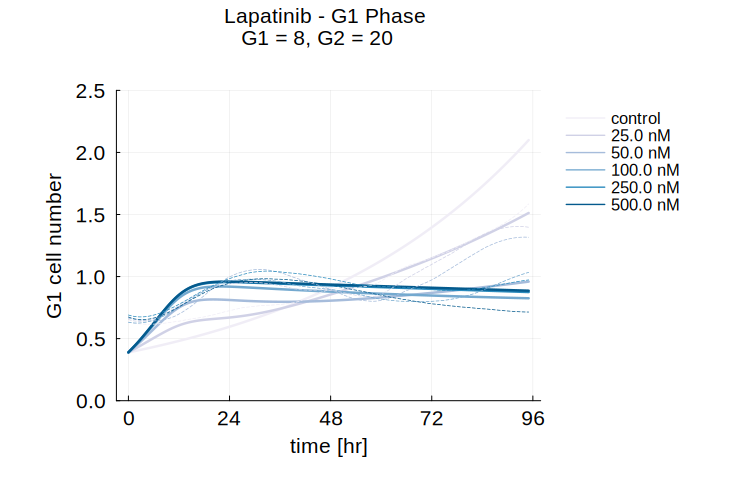

In [178]:
pl_G1_820 = plot_fig(concs[:, 1], l_G1_s820[:, :], g1mshort[:, :, 1, 1], 
    "Lapatinib - G1 Phase 
    G1 = 8, G2 = 20", "G1", "", :PuBu_6, time)

pl_G1_816 = plot_fig(concs[:, 1], l_G1_s816[:, :], g1mshort[:, :, 1, 1], 
    "Lapatinib - G1 Phase 
    G1 = 8, G2 = 16", "G1", "", :PuBu_6, time)

pl_G1_1232 = plot_fig(concs[:, 1], l_G1_s1232[:, :], g1mshort[:, :, 1, 1], 
    "Lapatinib - G1 Phase 
    G1 = 12, G2 = 32", "G1", "", :PuBu_6, time)

pl_G1_832 = plot_fig(concs[:, 1], l_G1_s832[:, :], g1mshort[:, :, 1, 1], 
    "Lapatinib - G1 Phase 
    G1 = 8, G2 = 32", "G1", "", :PuBu_6, time)

pl_G1_1220 = plot_fig(concs[:, 1], l_G1_s1220[:, :], g1mshort[:, :, 1, 1], 
    "Lapatinib - G1 Phase
    G1 = 12, G2 = 20", "G1", "", :PuBu_6, time)

pl_G1_824 = plot_fig(concs[:, 1], l_G1_s824[:, :], g1mshort[:, :, 1, 1], 
    "Lapatinib - G1 Phase 
    G1 = 8, G2 = 24", "G1", "", :PuBu_6, time)

savefig(pl_G1_820, "Lapatinib G1 820")
savefig(pl_G1_816, "Lapatinib G1 816")
savefig(pl_G1_1232, "Lapatinib G1 1232")
savefig(pl_G1_832, "Lapatinib G1 832")
savefig(pl_G1_1220, "Lapatinib G1 1220")
savefig(pl_G1_824, "Lapatinib G1 824")

pl_G1_820

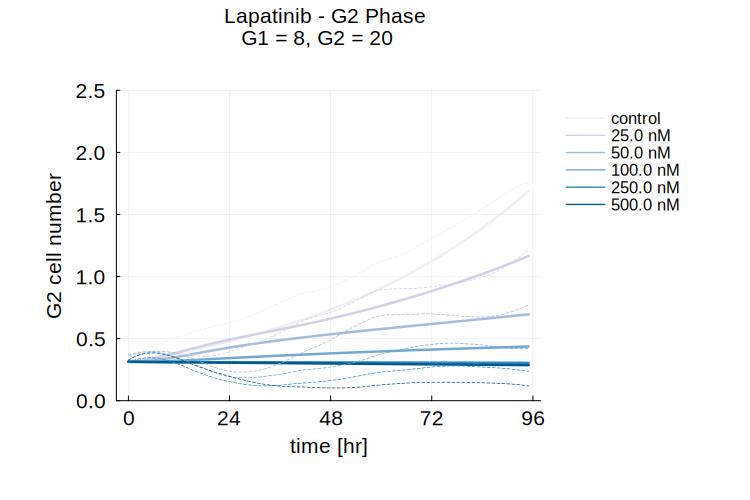

In [179]:
pl_G2_820 = plot_fig(concs[:, 1], l_G2_s820[:, :], g2mshort[:, :, 1, 1], 
    "Lapatinib - G2 Phase 
    G1 = 8, G2 = 20", "G2", "", :PuBu_6, time)

pl_G2_816 = plot_fig(concs[:, 1], l_G2_s816[:, :], g2mshort[:, :, 1, 1], 
    "Lapatinib - G2 Phase 
    G1 = 8, G2 = 16", "G2", "", :PuBu_6, time)

pl_G2_1232 = plot_fig(concs[:, 1], l_G2_s1232[:, :], g2mshort[:, :, 1, 1], 
    "Lapatinib - G2 Phase 
    G1 = 12, G2 = 32", "G2", "", :PuBu_6, time)

pl_G2_832 = plot_fig(concs[:, 1], l_G2_s832[:, :], g2mshort[:, :, 1, 1], 
    "Lapatinib - G2 Phase 
    G1 = 8, G2 = 32", "G2", "", :PuBu_6, time)

pl_G2_1220 = plot_fig(concs[:, 1], l_G2_s1220[:, :], g2mshort[:, :, 1, 1], 
    "Lapatinib - G2 Phase 
    G1 = 12, G2 = 20", "G2", "", :PuBu_6, time)

pl_G2_824 = plot_fig(concs[:, 1], l_G2_s832[:, :], g2mshort[:, :, 1, 1], 
    "Lapatinib - G2 Phase 
    G1 = 8, G2 = 24", "G2", "", :PuBu_6, time)


savefig(pl_G2_820, "Lapatinib G2 820")
savefig(pl_G2_816, "Lapatinib G2 816")
savefig(pl_G2_1232, "Lapatinib G2 1232")
savefig(pl_G2_832, "Lapatinib G2 832")
savefig(pl_G2_1220, "Lapatinib G2 1220")
savefig(pl_G2_824, "Lapatinib G2 824")

pl_G2_820

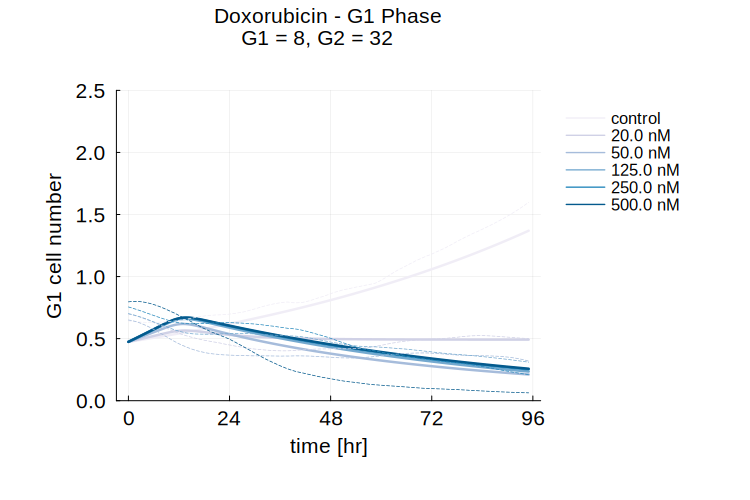

In [181]:
pd_G1_820 = plot_fig(concs[:, 2], d_G1_s820[:, :], g1mshort[:, :, 2, 1], 
    "Doxorubicin - G1 Phase
    G1 = 8, G2 = 20", "G1", "", :PuBu_6, time)

pd_G1_816 = plot_fig(concs[:, 2], d_G1_s816[:, :], g1mshort[:, :, 2, 1], 
    "Doxorubicin - G1 Phase
    G1 = 8, G2 = 16", "G1", "", :PuBu_6, time)

pd_G1_1232 = plot_fig(concs[:, 2], d_G1_s1232[:, :], g1mshort[:, :, 2, 1], 
    "Doxorubicin - G1 Phase
    G1 = 12, G2 = 32", "G1", "", :PuBu_6, time)

pd_G1_832 = plot_fig(concs[:, 2], d_G1_s832[:, :], g1mshort[:, :, 2, 1], 
    "Doxorubicin - G1 Phase
    G1 = 8, G2 = 32", "G1", "", :PuBu_6, time)

pd_G1_1220 = plot_fig(concs[:, 2], d_G1_s1220[:, :], g1mshort[:, :, 2, 1], 
    "Doxorubicin - G1 Phase
    G1 = 12, G2 = 20", "G1", "", :PuBu_6, time)

pd_G1_824 = plot_fig(concs[:, 2], d_G1_s824[:, :], g1mshort[:, :, 2, 1], 
    "Doxorubicin - G1 Phase
    G1 = 8, G2 = 24", "G1", "", :PuBu_6, time)

savefig(pd_G1_820, "Doxorubicin G1 820")
savefig(pd_G1_816, "Doxorubicin G1 816")
savefig(pd_G1_1232, "Doxorubicin G1 1232")
savefig(pd_G1_832, "Doxorubicin G1 832")
savefig(pd_G1_1220, "Doxorubicin G1 1220")
savefig(pd_G1_824, "Doxorubicin G1 824")

pd_G1_832

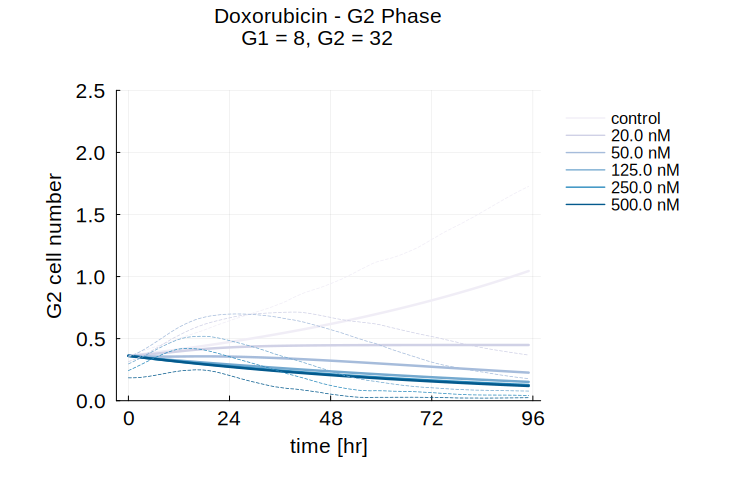

In [182]:
pd_G2_820 = plot_fig(concs[:, 2], d_G2_s820[:, :], g2mshort[:, :, 2, 1], 
    "Doxorubicin - G2 Phase
    G1 = 8, G2 = 20", "G2", "", :PuBu_6, time)

pd_G2_816 = plot_fig(concs[:, 2], d_G2_s816[:, :], g2mshort[:, :, 2, 1], 
    "Doxorubicin - G2 Phase
    G1 = 8, G2 = 16", "G2", "", :PuBu_6, time)

pd_G2_1232 = plot_fig(concs[:, 2], d_G2_s1232[:, :], g2mshort[:, :, 2, 1], 
    "Doxorubicin - G2 Phase
    G1 = 12, G2 = 32", "G2", "", :PuBu_6, time)

pd_G2_832 = plot_fig(concs[:, 2], d_G2_s832[:, :], g2mshort[:, :, 2, 1], 
    "Doxorubicin - G2 Phase
    G1 = 8, G2 = 32", "G2", "", :PuBu_6, time)

pd_G2_1220 = plot_fig(concs[:, 2], d_G2_s1220[:, :], g2mshort[:, :, 2, 1], 
    "Doxorubicin - G2 Phase
    G1 = 12, G2 = 20", "G2", "", :PuBu_6, time)

pd_G2_824 = plot_fig(concs[:, 2], d_G2_s824[:, :], g2mshort[:, :, 2, 1], 
    "Doxorubicin - G2 Phase
    G1 = 8, G2 = 24", "G2", "", :PuBu_6, time)

savefig(pd_G2_820, "Doxorubicin G2 820")
savefig(pd_G2_816, "Doxorubicin G2 816")
savefig(pd_G2_1232, "Doxorubicin G2 1232")
savefig(pd_G2_832, "Doxorubicin G2 832")
savefig(pd_G2_1220, "Doxorubicin G2 1220")
savefig(pd_G2_824, "Doxorubicin G2 824")

pd_G2_832

In [175]:
pg_G1_820 = plot_fig(concs[:, 3], g_G1_s820[:, :], g1mshort[:, :, 3, 1],
"Gemcitabine - G1 Phase
    G1 = 8, G2 = 20", "G1", "", :PuBu_6, time)

pg_G1_816 = plot_fig(concs[:, 3], g_G1_s816[:, :], g1mshort[:, :, 3, 1],
"Gemcitabine - G1 Phase
    G1 = 8, G2 = 16", "G1", "", :PuBu_6, time)

pg_G1_1232 = plot_fig(concs[:, 3], g_G1_s1232[:, :], g1mshort[:, :, 3, 1],
"Gemcitabine - G1 Phase
    G1 = 12, G2 = 32", "G1", "", :PuBu_6, time)

pg_G1_832 = plot_fig(concs[:, 3], g_G1_s832[:, :], g1mshort[:, :, 3, 1],
"Gemcitabine - G1 Phase
    G1 = 8, G2 = 32", "G1", "", :PuBu_6, time)

pg_G1_1220 = plot_fig(concs[:, 3], g_G1_s1220[:, :], g1mshort[:, :, 3, 1],
"Gemcitabine - G1 Phase
    G1 = 12, G2 = 20", "G1", "", :PuBu_6, time)

pg_G1_824 = plot_fig(concs[:, 3], g_G1_s824[:, :], g1mshort[:, :, 3, 1],
"Gemcitabine - G1 Phase
    G1 = 8, G2 = 24", "G1", "", :PuBu_6, time)

savefig(pg_G1_820, "Gemcitabine G1 820")
savefig(pg_G1_816, "Gemcitabine G1 816")
savefig(pg_G1_1232, "Gemcitabine G1 1232")
savefig(pg_G1_832, "Gemcitabine G1 832")
savefig(pg_G1_1220, "Gemcitabine G1 1220")
savefig(pg_G1_824, "Gemcitabine G1 824")

pd_

In [176]:
pg_G2_820 = plot_fig(concs[:, 3], g_G2_s820[:, :], g2mshort[:, :, 3, 1],
"Gemcitabine - G2 Phase
    G1 = 8, G2 = 20", "G2", "", :PuBu_6, time)

pg_G2_816 = plot_fig(concs[:, 3], g_G2_s816[:, :], g2mshort[:, :, 3, 1],
"Gemcitabine - G2 Phase
    G1 = 8, G2 = 16", "G2", "", :PuBu_6, time)

pg_G2_1232 = plot_fig(concs[:, 3], g_G2_s1232[:, :], g2mshort[:, :, 3, 1],
"Gemcitabine - G2 Phase
    G1 = 12, G2 = 32", "G2", "", :PuBu_6, time)

pg_G2_832 = plot_fig(concs[:, 3], g_G2_s832[:, :], g2mshort[:, :, 3, 1],
"Gemcitabine - G2 Phase
    G1 = 8, G2 = 32", "G2", "", :PuBu_6, time)

pg_G2_1220 = plot_fig(concs[:, 3], g_G2_s1220[:, :], g2mshort[:, :, 3, 1],
"Gemcitabine - G2 Phase
    G1 = 12, G2 = 20", "G2", "", :PuBu_6, time)

pg_G2_824 = plot_fig(concs[:, 3], g_G2_s824[:, :], g2mshort[:, :, 3, 1],
"Gemcitabine - G2 Phase
    G1 = 8, G2 = 24", "G2", "", :PuBu_6, time)

savefig(pg_G2_820, "Gemcitabine G2 820")
savefig(pg_G2_816, "Gemcitabine G2 816")
savefig(pg_G2_1232, "Gemcitabine G2 1232")
savefig(pg_G2_832, "Gemcitabine G2 832")
savefig(pg_G2_1220, "Gemcitabine G2 1220")
savefig(pg_G2_824, "Gemcitabine G2 824")

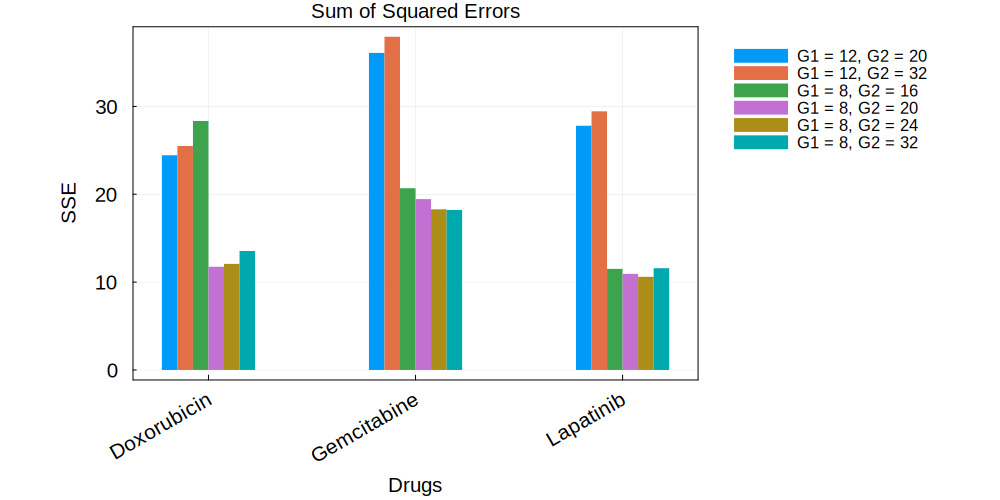

In [177]:
l_G1_combined = zeros(189, 8, 6)
l_G1_combined[:,:,1] = l_G1_820
l_G1_combined[:,:,2] = l_G1_816
l_G1_combined[:,:,3] = l_G1_1232
l_G1_combined[:,:,4] = l_G1_832
l_G1_combined[:,:,5] = l_G1_1220
l_G1_combined[:,:,6] = l_G1_824

l_G2_combined = zeros(189, 8, 6)
l_G2_combined[:,:,1] = l_G2_820
l_G2_combined[:,:,2] = l_G2_816
l_G2_combined[:,:,3] = l_G2_1232
l_G2_combined[:,:,4] = l_G2_832
l_G2_combined[:,:,5] = l_G2_1220
l_G2_combined[:,:,6] = l_G2_824

d_G1_combined = zeros(189, 8, 6)
d_G1_combined[:,:,1] = d_G1_820
d_G1_combined[:,:,2] = d_G1_816
d_G1_combined[:,:,3] = d_G1_1232
d_G1_combined[:,:,4] = d_G1_832
d_G1_combined[:,:,5] = d_G1_1220
d_G1_combined[:,:,6] = d_G1_824

d_G2_combined = zeros(189, 8, 6)
d_G2_combined[:,:,1] = d_G2_820
d_G2_combined[:,:,2] = d_G2_816
d_G2_combined[:,:,3] = d_G2_1232
d_G2_combined[:,:,4] = d_G2_832
d_G2_combined[:,:,5] = d_G2_1220
d_G2_combined[:,:,6] = d_G2_824

g_G1_combined = zeros(189, 8, 6)
g_G1_combined[:,:,1] = g_G1_820
g_G1_combined[:,:,2] = g_G1_816
g_G1_combined[:,:,3] = g_G1_1232
g_G1_combined[:,:,4] = g_G1_832
g_G1_combined[:,:,5] = g_G1_1220
g_G1_combined[:,:,6] = g_G1_824

g_G2_combined = zeros(189, 8, 6)
g_G2_combined[:,:,1] = g_G2_820
g_G2_combined[:,:,2] = g_G2_816
g_G2_combined[:,:,3] = g_G2_1232
g_G2_combined[:,:,4] = g_G2_832
g_G2_combined[:,:,5] = g_G2_1220
g_G2_combined[:,:,6] = g_G2_824


sse = SSE(l_G1_combined, l_G2_combined,
    d_G1_combined, d_G2_combined,
    g_G1_combined, g_G2_combined,
    g1m, g2m, "", 6)

savefig(sse, "Sum of Squared Errors")
sse